# Step 0:  Data Import from the file.

In [14]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/Users/srahul/Downloads/day.csv')

# Convert categorical variables
# Note: Transform season, yr, month, holiday, weekday, workingday, weathersit
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Preprocessing steps
# 1. One-hot encode categorical variables
# 2. Prepare features and target variable
# 3. Split data into training and testing sets

# EDA : Exploratory Data Analysis

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [8]:
# Understand data distribution
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [12]:
# Convert dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Extract useful date-related features
df['day_of_week'] = df['dteday'].dt.day_name()
df['month_name'] = df['dteday'].dt.month_name()
df['quarter'] = df['dteday'].dt.quarter
df['is_weekend'] = df['dteday'].dt.dayofweek.isin([5, 6]).astype(int)

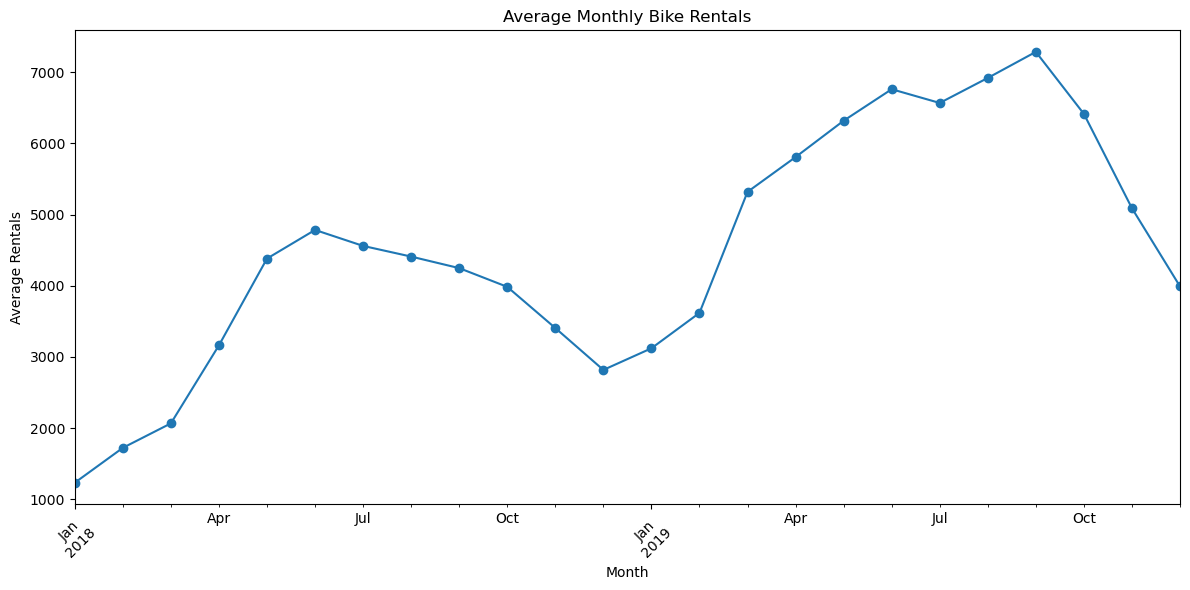

In [13]:
# Monthly rental trends
monthly_rentals = df.groupby(df['dteday'].dt.to_period('M'))['cnt'].mean()
plt.figure(figsize=(12,6))
monthly_rentals.plot(kind='line', marker='o')
plt.title('Average Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# 2. Exploratory Data Analysis

In [16]:
# Dataset Overview
print("Dataset Basic Information:")
print(df.info())

# Missing Value Check
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

Missing Values:
instant       0
dteday        0
season      

In [ ]:
# 2.2 Descriptive Statistics

In [17]:
# Summary Statistics for Numeric Columns
print("\nDescriptive Statistics:")
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
print(df[numeric_columns].describe())


Descriptive Statistics:
             temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
std      7.506729    8.150308   14.237589    5.195841   686.479875   
min      2.424346    3.953480    0.000000    1.500244     2.000000   
25%     13.811885   16.889713   52.000000    9.041650   316.250000   
50%     20.465826   24.368225   62.625000   12.125325   717.000000   
75%     26.880615   30.445775   72.989575   15.625589  1096.500000   
max     35.328347   42.044800   97.250000   34.000021  3410.000000   

        registered          cnt  
count   730.000000   730.000000  
mean   3658.757534  4508.006849  
std    1559.758728  1936.011647  
min      20.000000    22.000000  
25%    2502.250000  3169.750000  
50%    3664.500000  4548.500000  
75%    4783.250000  5966.000000  
max    6946.000000  8714.000000  


In [ ]:
# 2.3 Correlation Analysis

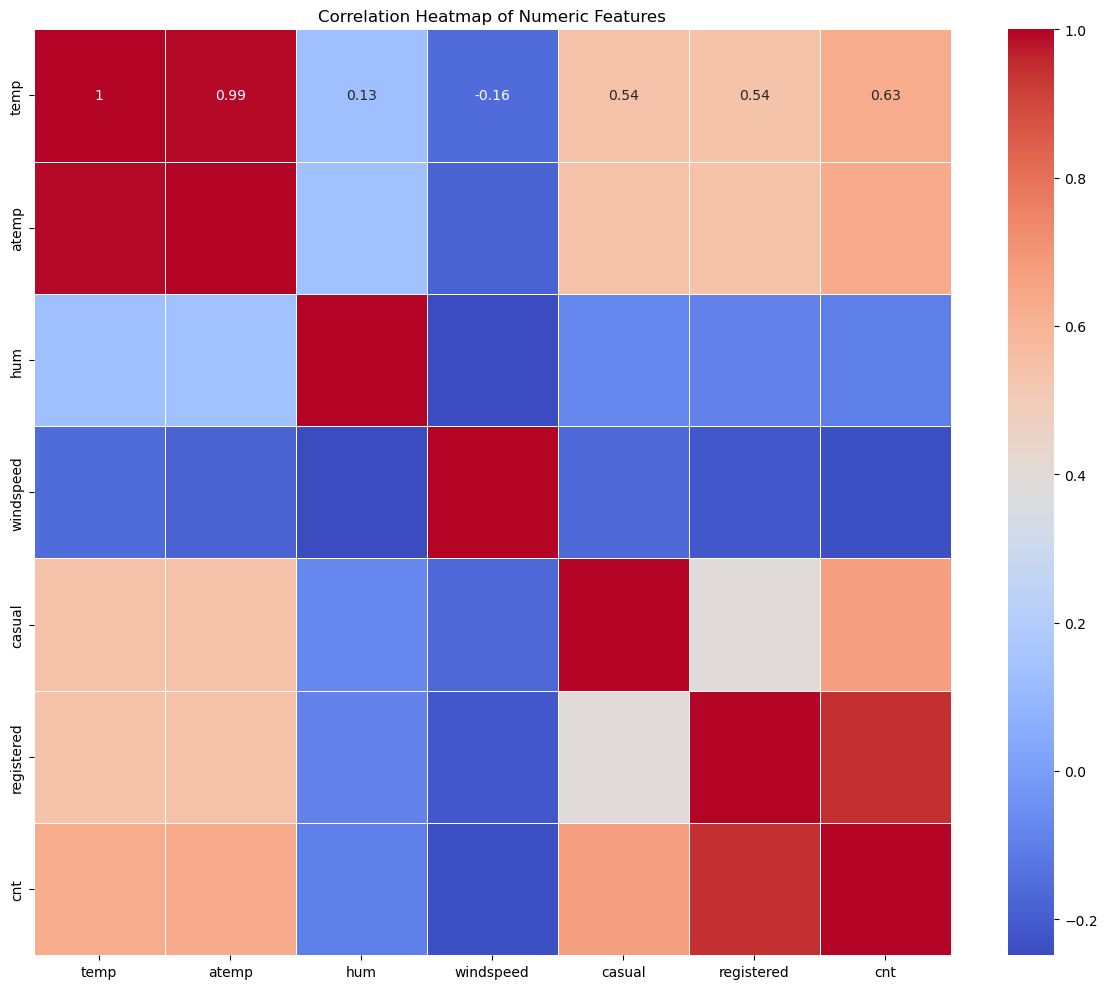

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
# 2.4 Target Variable Distribution

/Users/srahul/240424/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


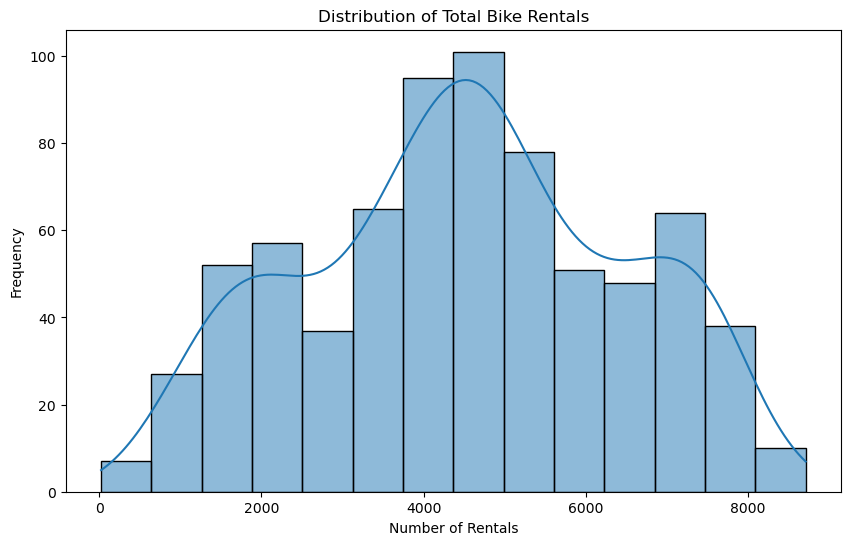

In [19]:
# Distribution of Total Bike Rentals
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 2.5 Categorical Feature Analysis

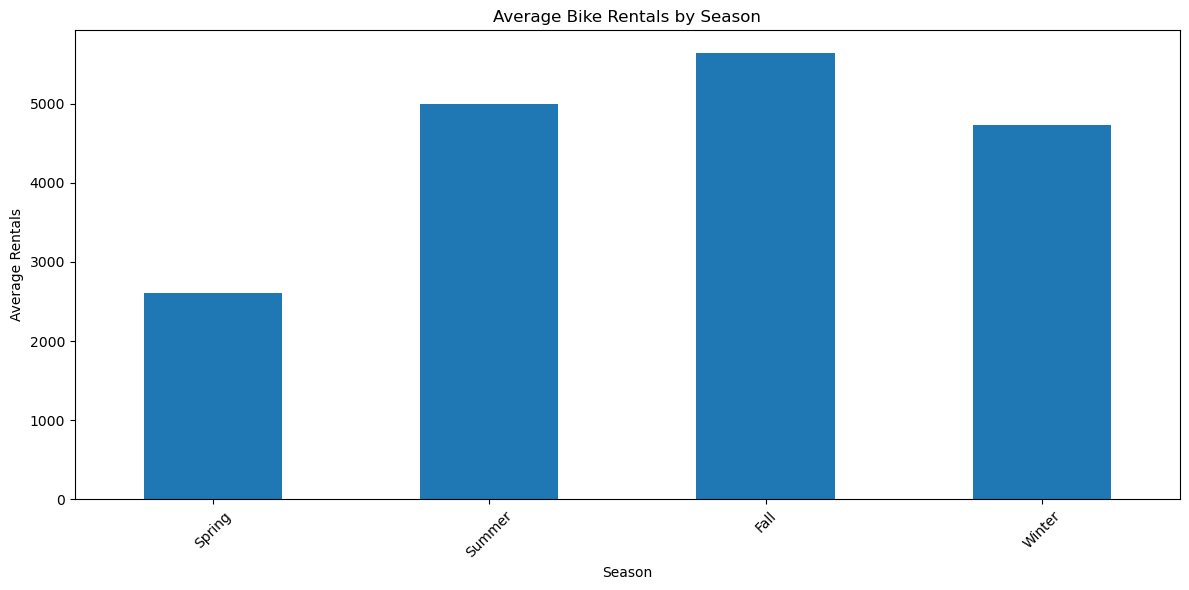

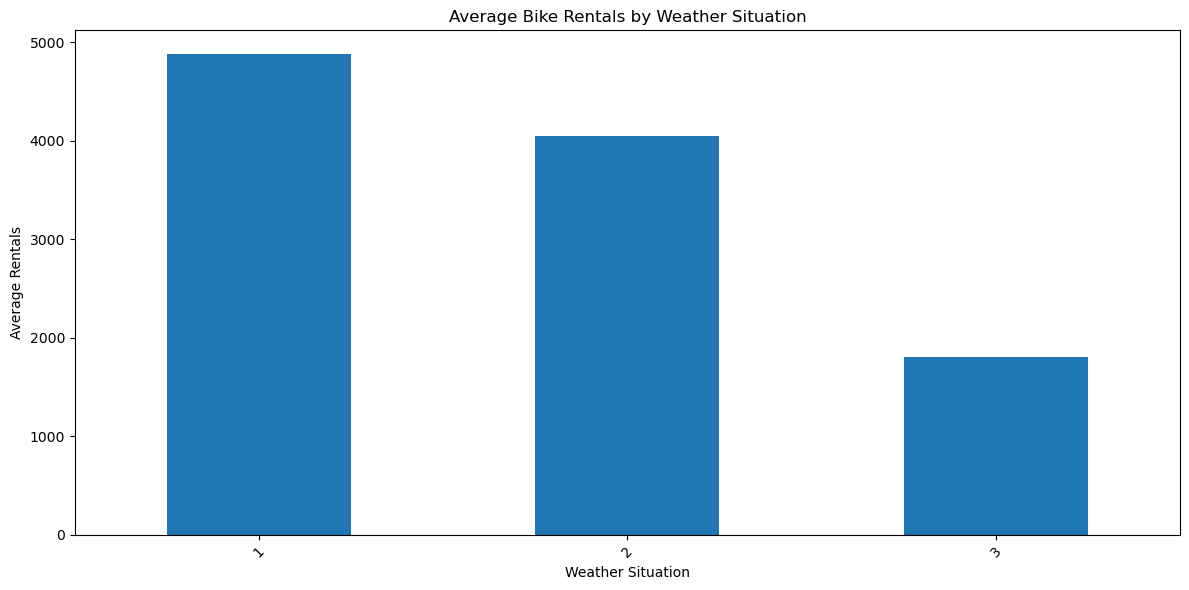

In [20]:
# Bike Rentals by Season
plt.figure(figsize=(12, 6))
season_rentals = df.groupby('season')['cnt'].mean()
season_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
plt.tight_layout()
plt.show()

# Bike Rentals by Weather Situation
plt.figure(figsize=(12, 6))
weather_rentals = df.groupby('weathersit')['cnt'].mean()
weather_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.6 Time-based Analysis

In [21]:
# Monthly Rental Trends
monthly_rentals = df.groupby(df['dteday'].dt.to_period('M'))['cnt'].mean()
plt.figure(figsize=(12, 6))
monthly_rentals.plot(kind='line', marker='o')
plt.title('Average Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
## Trying again with another data conversionm technique

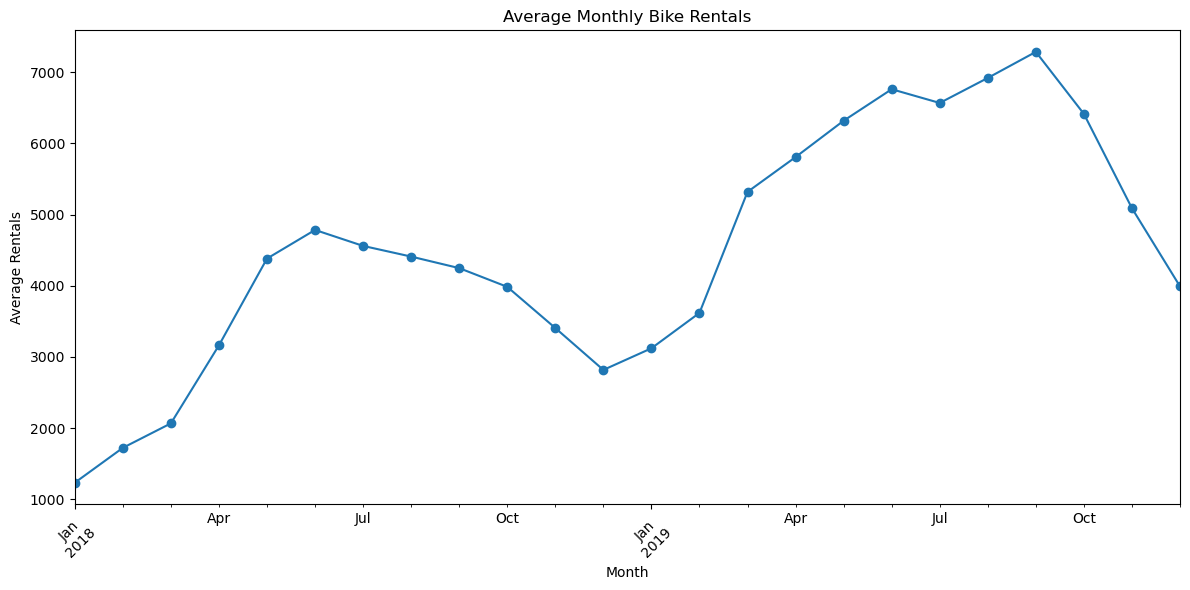

In [22]:
# Ensure proper date conversion
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Monthly Rental Trends with Robust Conversion
monthly_rentals = df.groupby(pd.Grouper(key='dteday', freq='M'))['cnt'].mean()

plt.figure(figsize=(12, 6))
monthly_rentals.plot(kind='line', marker='o')
plt.title('Average Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.1A Monthly Analysis with More Details

In [23]:
# Detailed Monthly Analysis
monthly_summary = df.groupby(df['dteday'].dt.to_period('M')).agg({
    'cnt': ['mean', 'min', 'max'],
    'casual': 'mean',
    'registered': 'mean'
})

print("Monthly Rental Summary:")
print(monthly_summary)

Monthly Rental Summary:
                 cnt                   casual   registered
                mean   min   max         mean         mean
dteday                                                    
2018-01  1231.903226   431  1985    99.129032  1132.774194
2018-02  1721.964286  1005  2927   222.928571  1499.035714
2018-03  2065.967742   605  3239   413.741935  1652.225806
2018-04  3162.333333   795  5312   744.866667  2417.466667
2018-05  4381.322581  2633  5805  1001.612903  3379.709677
2018-06  4783.733333  3767  5515  1020.400000  3763.333333
2018-07  4559.387097  3285  6043  1175.870968  3383.516129
2018-08  4409.387097  1115  5895   930.387097  3479.000000
2018-09  4247.266667  1842  5423   884.833333  3362.433333
2018-10  3984.225806   627  5511   813.612903  3170.612903
2018-11  3405.566667  1495  4486   519.800000  2885.766667
2018-12  2816.870968   705  3940   272.516129  2544.354839
2019-01  3120.774194  1301  4521   289.322581  2831.451613
2019-02  3617.964286  1529  5062

In [ ]:
# 2.2A Seasonal Rental Trends

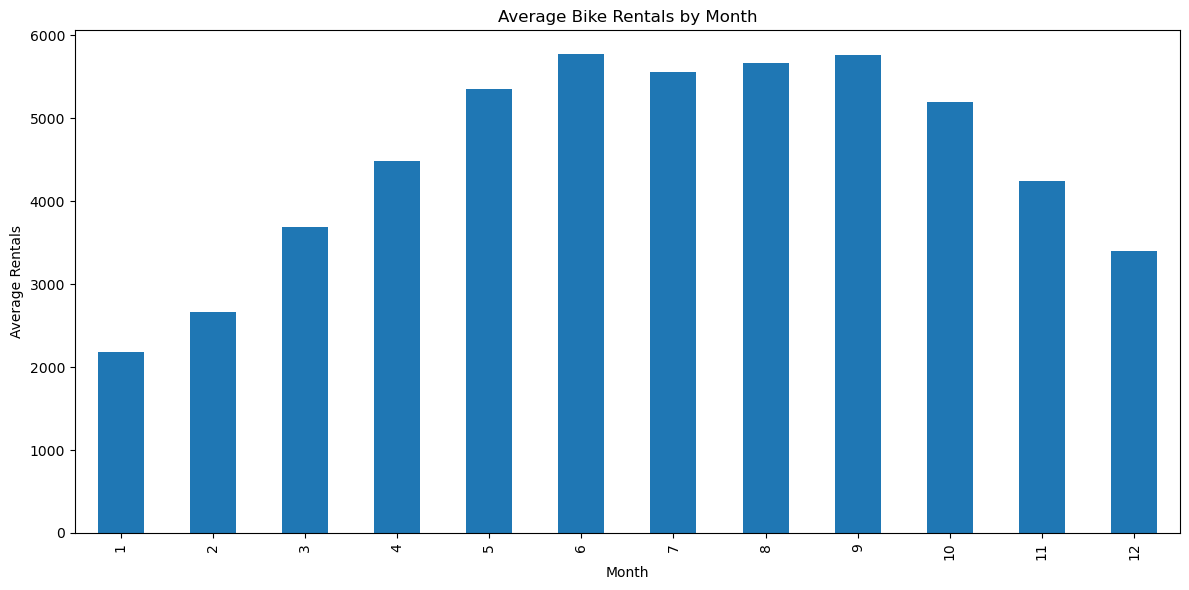

In [24]:
# Seasonal Rental Analysis
seasonal_rentals = df.groupby(df['dteday'].dt.month)['cnt'].mean()

plt.figure(figsize=(12, 6))
seasonal_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.tight_layout()
plt.show()

In [ ]:
# 2.3A Year-over-Year Comparison

In [25]:
# Year-over-Year Rental Comparison
yearly_rentals = df.groupby(df['dteday'].dt.year)['cnt'].agg(['mean', 'sum'])
print("\nYearly Rental Statistics:")
print(yearly_rentals)


Yearly Rental Statistics:
               mean      sum
dteday                      
2018    3405.761644  1243103
2019    5610.252055  2047742


In [ ]:
# 2.4A Day of Week Analysis

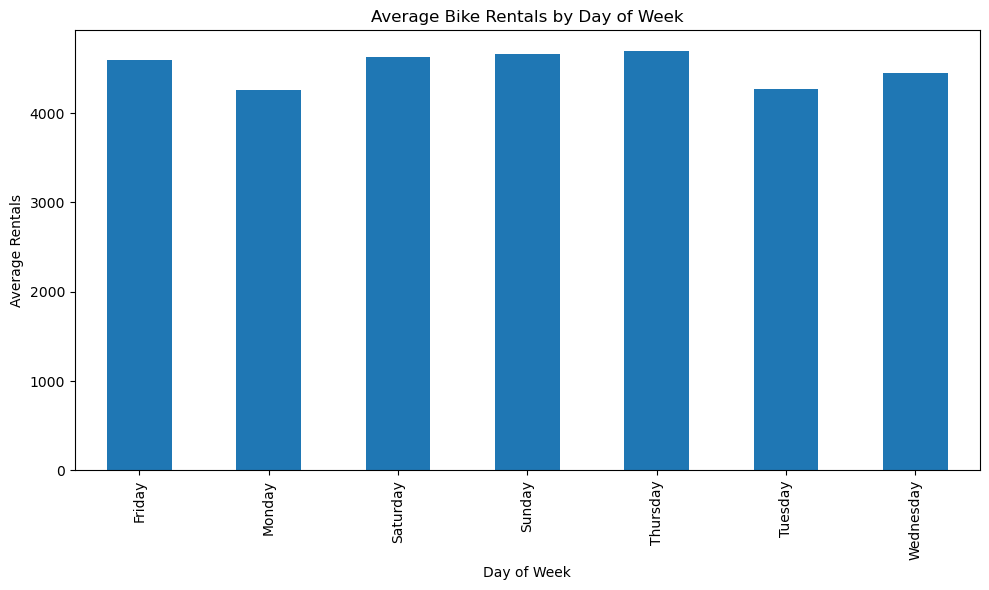

In [26]:
# Rentals by Day of Week
day_of_week_rentals = df.groupby(df['dteday'].dt.day_name())['cnt'].mean()
plt.figure(figsize=(10, 6))
day_of_week_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rentals')
plt.tight_layout()
plt.show()

# 3. Feature Engineering

In [28]:
 # Feature Engineering and Preprocessing

# 1. Create New Features
df['is_weekend'] = df['weekday'].isin([0, 6]).astype(int)
df['season_encoded'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# 2. Categorical Encoding
categorical_columns = ['season_encoded', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 3. Feature Selection
features = (
    ['temp', 'atemp', 'hum', 'windspeed', 'is_weekend'] + 
    [col for col in df_encoded.columns if col.startswith(tuple(categorical_columns))]
)

# Prepare X and y
X = df_encoded[features]
y = df_encoded['cnt']

# 4. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Building and Evaluation

Model Performance Metrics:
Mean Squared Error: 485651.84
Root Mean Squared Error: 696.89
R-squared Score: 0.8581

Feature Coefficients:
                  Feature   Coefficient
4              is_weekend -4.170049e+16
5     season_encoded_Fall  3.545080e+16
8   season_encoded_Winter  3.500010e+16
7   season_encoded_Summer  3.476522e+16
6   season_encoded_Spring  3.375905e+16
20                mnth_10 -2.723424e+16
17                 mnth_7 -2.679409e+16
11                 mnth_1 -2.656987e+16
21                mnth_11 -2.634279e+16
15                 mnth_5 -2.634279e+16
16                 mnth_6 -2.587974e+16
19                 mnth_9 -2.587974e+16
14                 mnth_4 -2.516172e+16
18                 mnth_8 -2.466635e+16
22                mnth_12 -2.441335e+16
12                 mnth_2 -2.415667e+16
25              weekday_0  2.330645e+16
31              weekday_6  2.286223e+16
13                 mnth_3 -2.281352e+16
34           weathersit_1 -2.171757e+16
35           weathersit_

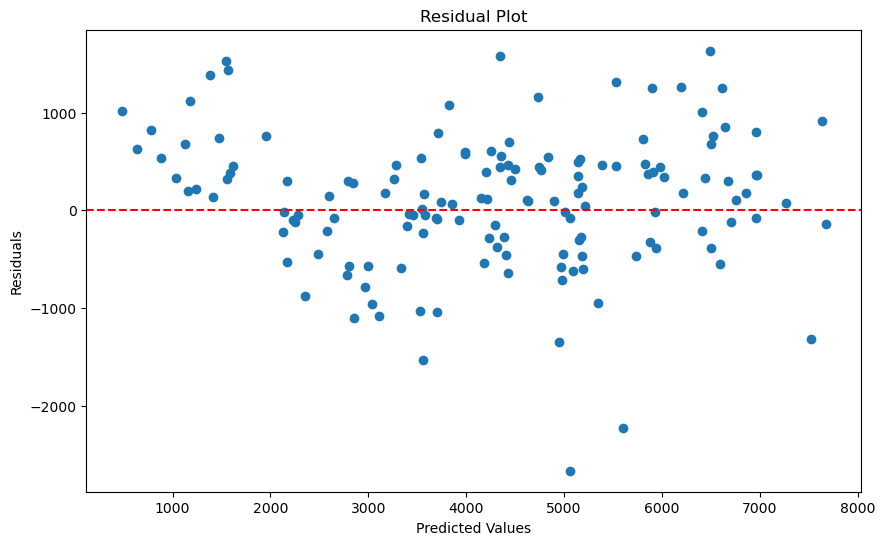

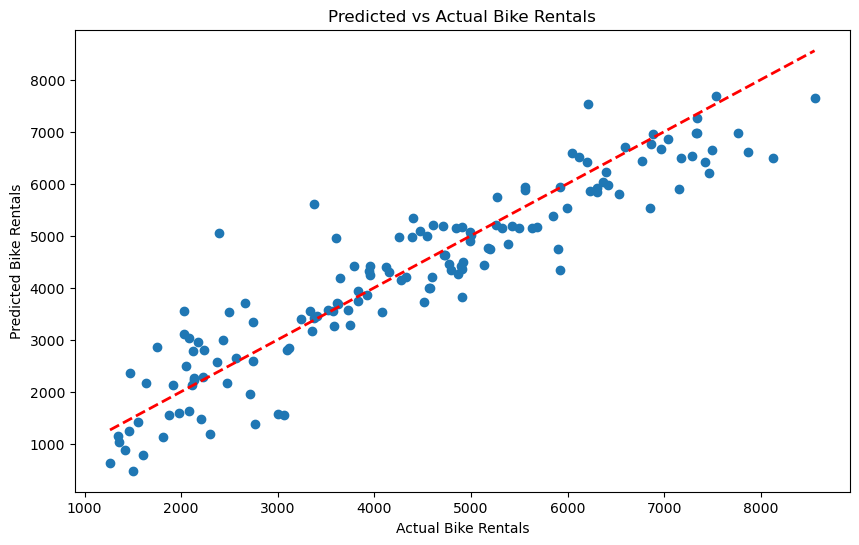

In [30]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create Linear Regression Model
linear_regression = LinearRegression()

# Fit the model
linear_regression.fit(X_train_scaled, y_train)

# Make predictions
y_pred = linear_regression.predict(X_test_scaled)

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("Model Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Coefficients Analysis
feature_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_regression.coef_
})
feature_coefficients = feature_coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Coefficients:")
print(feature_coefficients)

# Residual Analysis
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Bike Rentals')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.show()

Cross-validation Scores: [ 0.83283324  0.63393165  0.84243687 -0.98413341 -0.41140329]
Mean CV Score: 0.18273301129684985


<Figure size 1200x600 with 0 Axes>

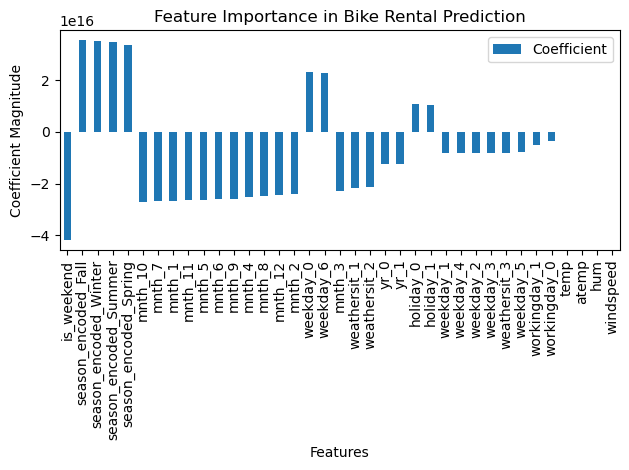

In [31]:
# Additional Model Diagnostics
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(linear_regression, X_train_scaled, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Feature Importance Visualization
plt.figure(figsize=(12, 6))
feature_coefficients.plot(x='Feature', y='Coefficient', kind='bar')
plt.title('Feature Importance in Bike Rental Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()